<a href="https://colab.research.google.com/github/plaban1981/Feature-Engineering-Techniques/blob/master/Variable_transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gaussian Transformation

Some machine learning models like linear and logistic regression assume that the variables are normally distributed. Often, variables are not normally distributed, but, transforming the variables to map their distribution to a Gaussian distribution may, and often does, boost the performance of the machine learning algorithm.

If a variable is not normally distributed, it is often  possible to find a mathematical transformation to normalise its distribution.


### How can we transform variables so that they follow a normal distribution?

The most commonly used methods to transform variables are:

- Logarithmic transformation - np.log(X)
- Reciprocal transformation - 1 / X
- Square root transformation - X**(1/2)
- Exponential transformation (more general, you can use any exponent)
- Box-Cox transformation
- Yeo-Johnson transformation

You can find the formulas for Box-Cox and Yeo-Johnson [here](https://scikit-learn.org/stable/modules/preprocessing.html#mapping-to-a-gaussian-distribution)

Briefly, the Box-Cox transformation is an adaptation of the exponential transformation, scanning through various exponents, and it already represents the untransformed variable, as well as the log transformed, reciprocal, square and cube root transformed, as the lambda varies across the range of -5 to 5 (see formula or accompanying video, to understand this better). So by doing Box-Cox transformation, in a way, we are evaluating all the other transformations and choosing the best one. Box-Cox can only be applied to positive variables.

Yeo-Johnson is a modification of the Box-Cox transformation so that it can be applied as well to non-positive variables

To read more about the **Box-Cox** transformation visit any of these links:
- http://www.statisticshowto.com/box-cox-transformation/
- http://www.itl.nist.gov/div898/handbook/eda/section3/eda336.htm
- http://onlinestatbook.com/2/transformations/box-cox.html

To read more about the Yeo-Johnson transformation follow this [link](https://www.stat.umn.edu/arc/yjpower.pdf):

## In this demo

We will see how to implement variable transformations using NumPy and the House Prices dataset.

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import scipy.stats as stats

#scikit Learn
from sklearn.preprocessing import FunctionTransformer,PowerTransformer

In [3]:
# load the data
from google.colab import files
files.upload()
#


Saving housing_train.csv to housing_train.csv


{'housing_train.csv': b'Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice\n1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,Viny

In [4]:
data = pd.read_csv('housing_train.csv')

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


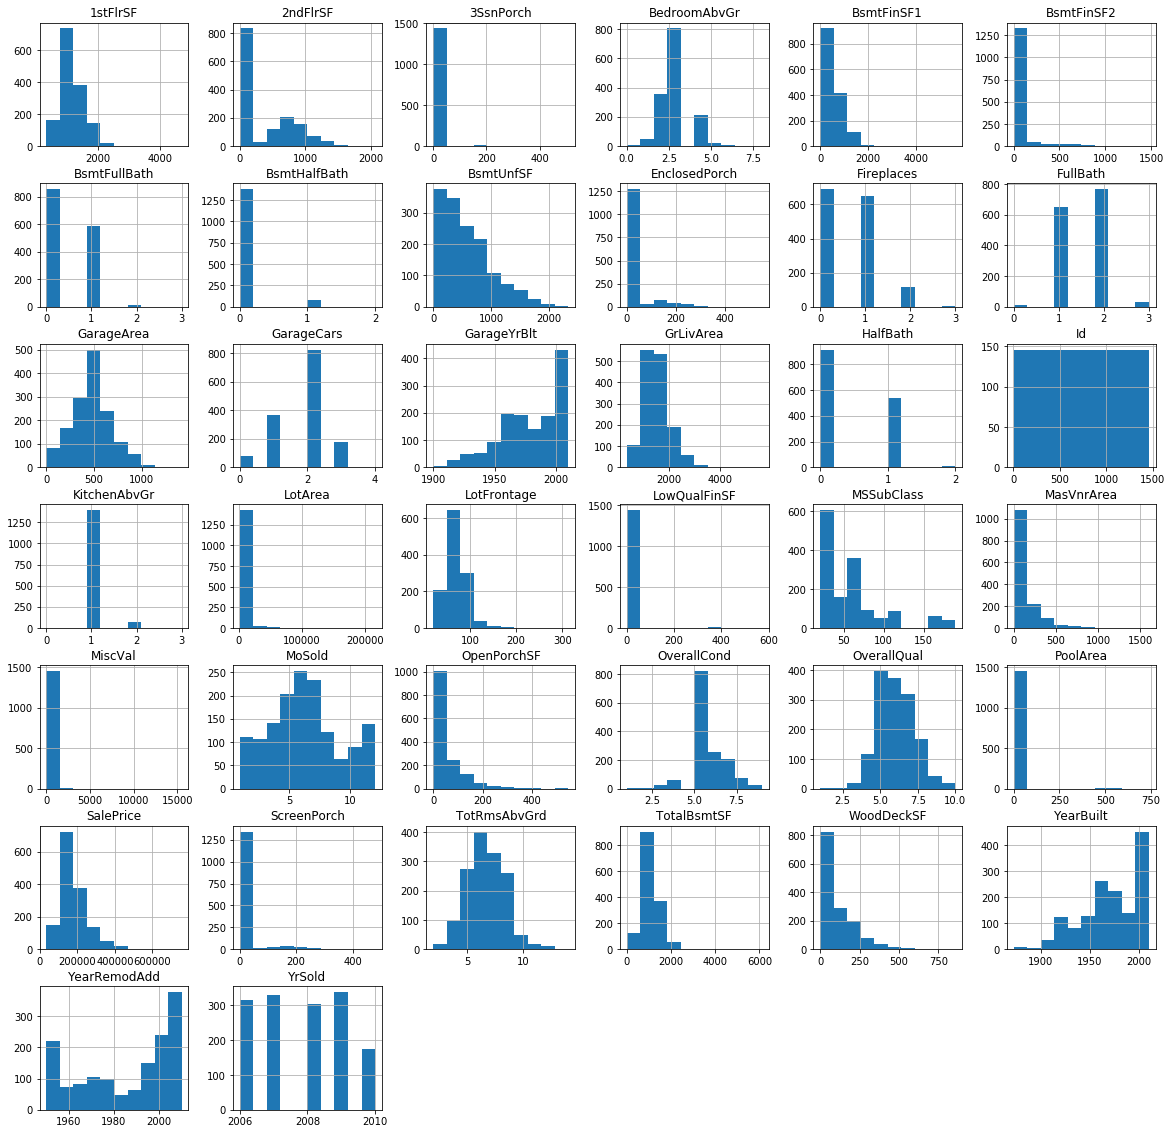

In [5]:
# let's explore the distribution of the numerical variables

data.hist(figsize=(20,20))
plt.show()

## Plots to assess normality

To visualise the distribution of the variables, we plot a histogram and a Q-Q plot. In the Q-Q pLots, if the variable is normally distributed, the values of the variable should fall in a 45 degree line when plotted against the theoretical quantiles. We discussed this extensively in Section 3 of this course.

In [0]:
# plot the histograms to have a quick look at the variable distribution
# histogram and Q-Q plots

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

### Original distribution

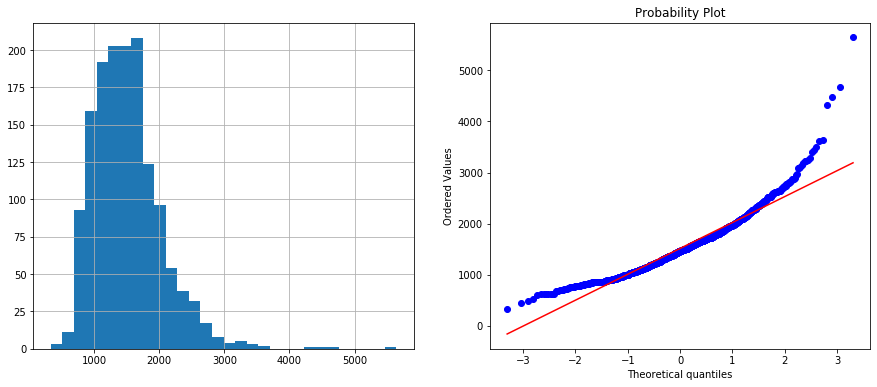

In [7]:
diagnostic_plots(data, 'GrLivArea')

We can see in the plots that the variable is not normally distributed. The values depart from the red line towards the ends of the distribution and we can see in the histogram that it is skewed to the right.

### Logarithmic transformation

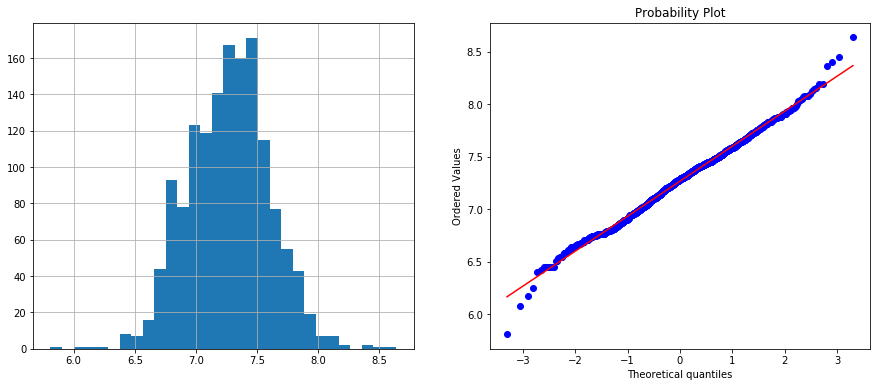

In [8]:
### Logarithmic transformation

data['GrLivArea_log'] = np.log(data['GrLivArea'])

diagnostic_plots(data, 'GrLivArea_log')

The logarithmic transformation returned a more Gaussian for this variable.

## Logarithmic Transformation using scikit-learn

In [67]:
cols = []
for col in data.columns:
  if data[col].dtypes != 'O' and col != 'Id' and '_' not in col:
    if np.sum(np.where(data[col] <= 0,1,0)) == 0:
      cols.append(col)

cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'MoSold',
 'YrSold',
 'SalePrice']

In [0]:
transformer = FunctionTransformer(func=np.log,validate=True)
data_t = transformer.transform(data[cols].fillna(1))
data_t = pd.DataFrame(data_t,columns=cols)

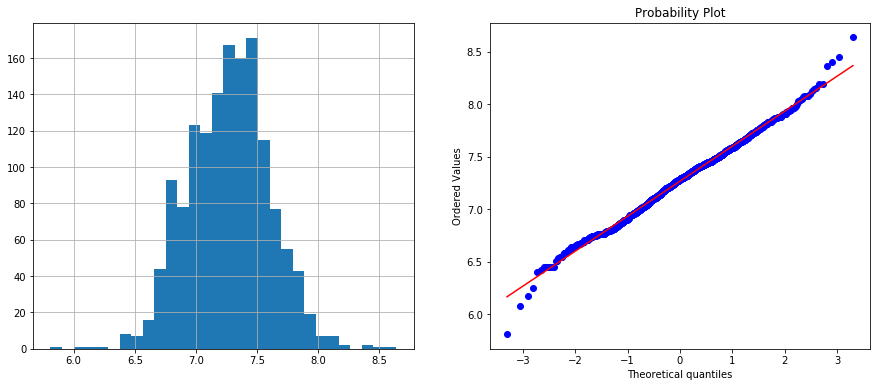

In [61]:
diagnostic_plots(data_t, 'GrLivArea')

## Logarithmic Transformation using Feature-Engine

In [62]:
!pip install feature_engine

  Created wheel for numpydoc: filename=numpydoc-0.9.2-cp36-none-any.whl size=31893 sha256=3eb96323d67b98348eda233da5c186b81f6b66e19f2ad8ff9ebfdef07c339288
  Stored in directory: /root/.cache/pip/wheels/96/f3/52/25c8e1f40637661d27feebc61dae16b84c7cdd93b8bc3d7486
Successfully built numpydoc


In [0]:
from feature_engine import variable_transformers as vt

In [0]:
transformer = vt.LogTransformer(variables = cols)
transformer.fit(data)
data_tf = transformer.transform(data)

In [69]:
transformer.variables

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'MoSold',
 'YrSold',
 'SalePrice']

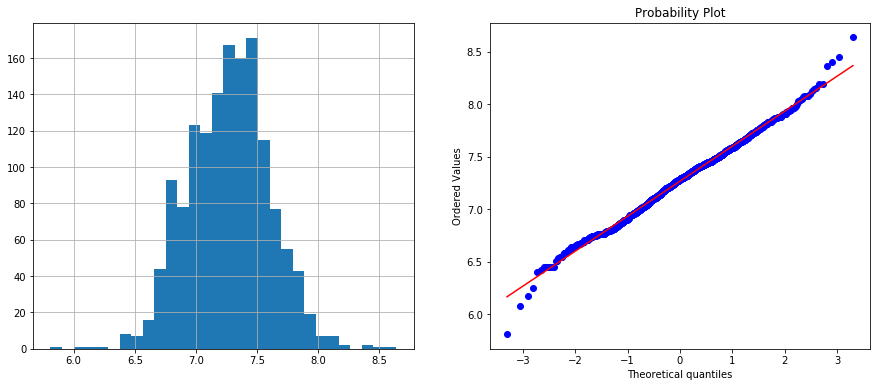

In [65]:
diagnostic_plots(data_tf, 'GrLivArea')

### Reciprocal transformation

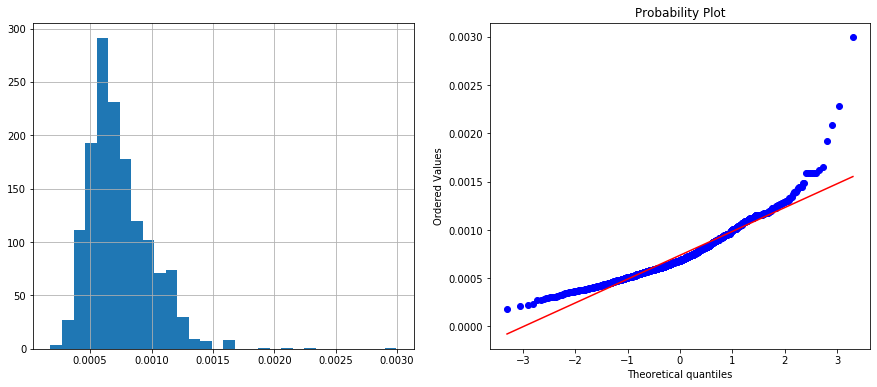

In [32]:
### Reciprocal transformation

data['GrLivArea_reciprocal'] = 1 / (data['GrLivArea']) 

# np.reciprocal(data['GrLivArea'])

diagnostic_plots(data, 'GrLivArea_reciprocal')

The reciprocal transformation was not useful to transform this variable.



## Reciprocal Transformation using scikit-learn

In [33]:
#selecting numerical and positive values
cols = []
for col in data.columns:
  if data[col].dtypes != 'O' and col != 'Id':
    if np.sum(np.where(data[col] <= 0,1,0)) == 0:
      cols.append(col)

cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'MoSold',
 'YrSold',
 'SalePrice',
 'GrLivArea_log',
 'GrLivArea_reciprocal',
 'GrLivArea_sqr',
 'GrLivArea_exp',
 'GrLivArea_boxcox',
 'GrLivArea_yeojohnson']

In [0]:
transformer = FunctionTransformer(lambda x : 1/x,validate=True)
data_t = transformer.transform(data[cols].fillna(1))
data_t = pd.DataFrame(data_t,columns=cols)

## Transformed Reciprocal distribution

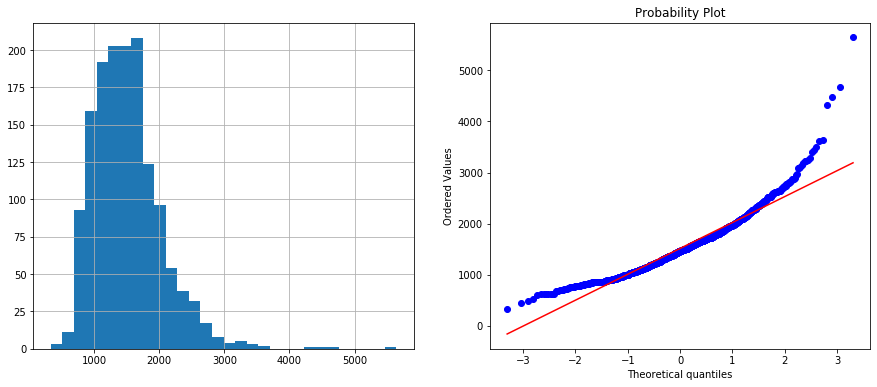

In [36]:
diagnostic_plots(data_t, 'GrLivArea_reciprocal')

This transformation didnot work very well.

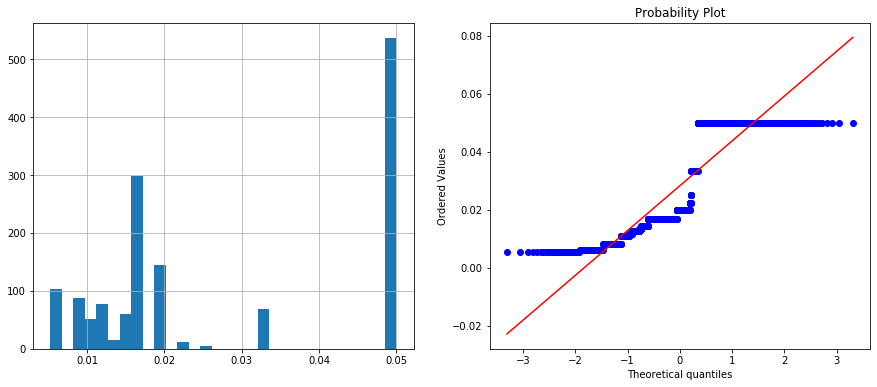

In [37]:
diagnostic_plots(data_t, 'MSSubClass')

## Reciprocal Transformation using Feature Engine

In [0]:
from feature_engine import variable_transformers as vt
transformer = vt.ReciprocalTransformer(variables=cols)
transformer.fit(data)
data_tf = transformer.transform(data)

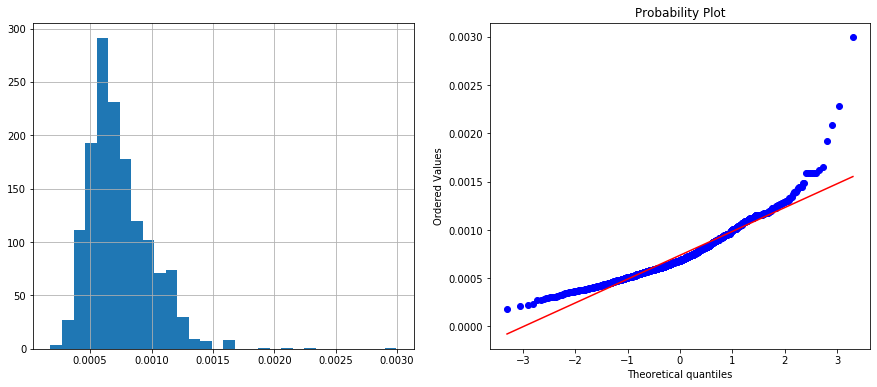

In [73]:
diagnostic_plots(data_tf, 'GrLivArea')

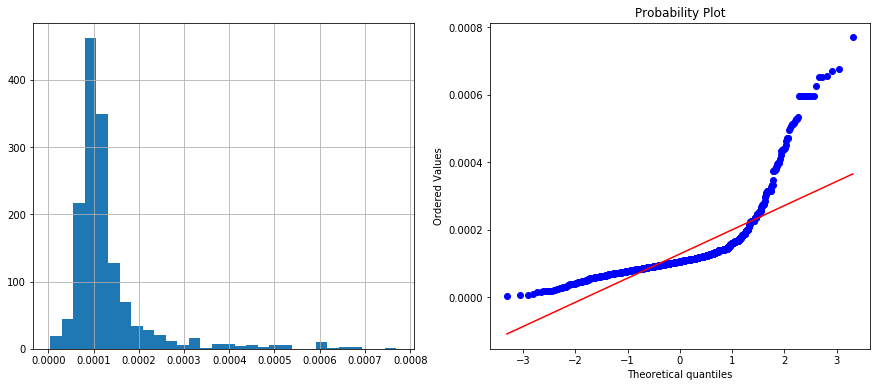

In [74]:
diagnostic_plots(data_tf, 'LotArea')

### Square root transformation

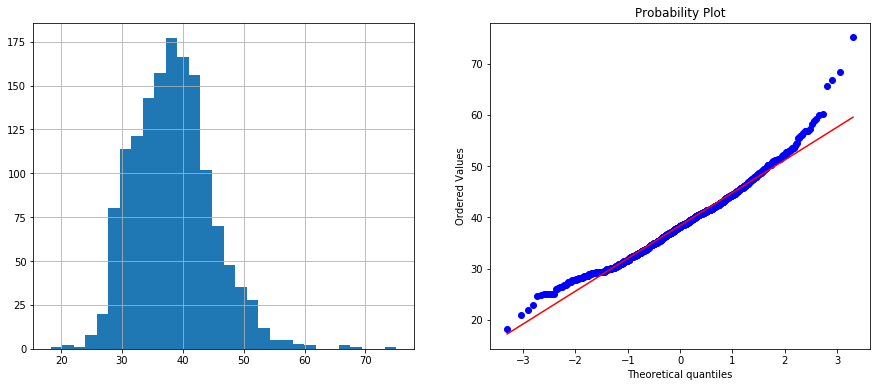

In [38]:
data['GrLivArea_sqr'] = data['GrLivArea']**(1/2) 

# np.power(data['GrLivArea'], 1/2), np.sqrt(data['GrLivArea'])

diagnostic_plots(data, 'GrLivArea_sqr')

The square root transformation offers a good alternative to normalise this variable.



## Squareroot Transformation using scikit-learn

In [0]:
transformer = FunctionTransformer(func= lambda x : np.sqrt(x),validate=True)
data_t = transformer.transform(data[cols].fillna(1))
data_t = pd.DataFrame(data_t,columns=cols)


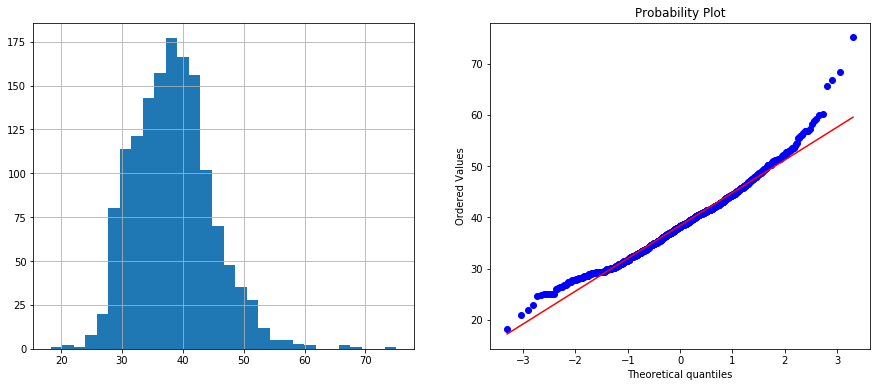

In [40]:
diagnostic_plots(data, 'GrLivArea_sqr')

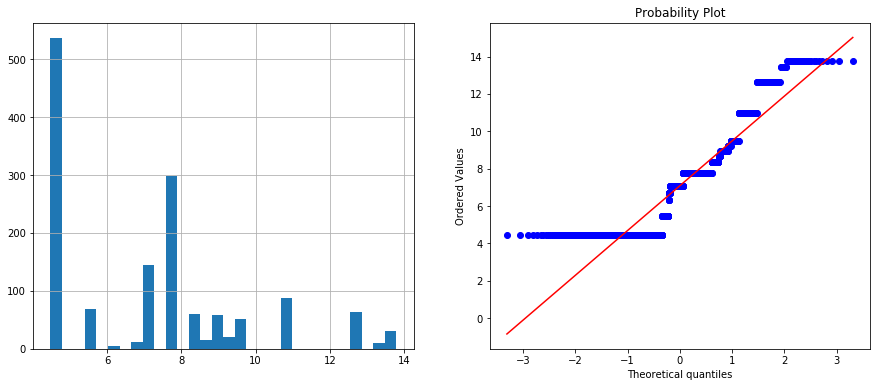

In [41]:
diagnostic_plots(data_t, 'MSSubClass')

### Exponential

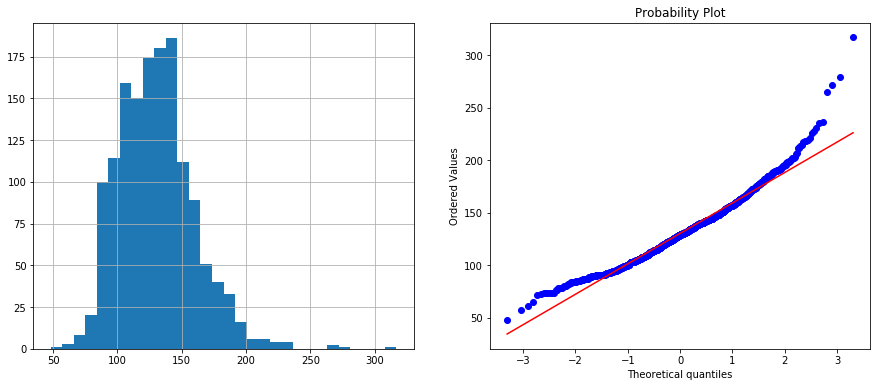

In [11]:
data['GrLivArea_exp'] = data['GrLivArea']**(1/1.5) # you can vary the exponent as needed

# np.power(data['GrLivArea'], any exponent we want)

diagnostic_plots(data, 'GrLivArea_exp')

The exponential transformation did not work so nicely for this variable.

## Exponential Transformation using scikit-learn


In [0]:
transformer = FunctionTransformer(func=lambda x : x **(1/1.2),validate=True)
data_t = transformer.transform(data[cols].fillna(1))
data_t = pd.DataFrame(data_t,columns=cols)

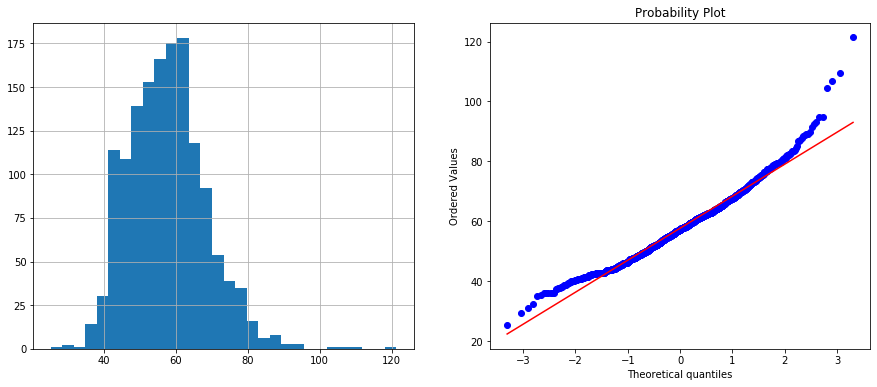

In [44]:
diagnostic_plots(data_t, 'GrLivArea')

## Exponential Transformer using Feature_Engine

In [0]:
et = vt.PowerTransformer(variables=cols)
et.fit(data)
data_tf = et.transform(data)

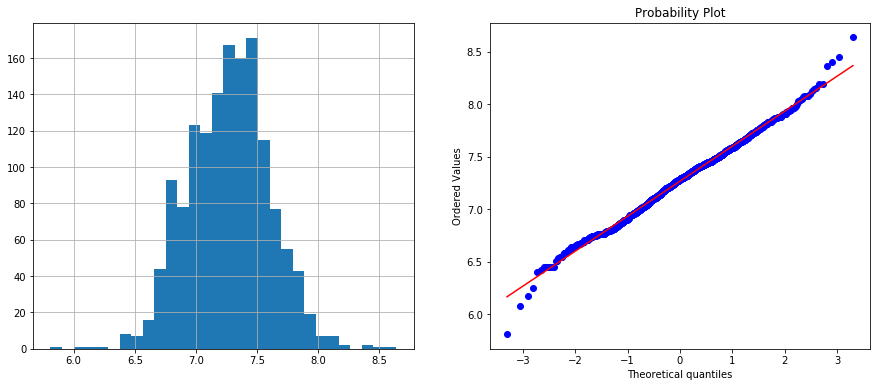

In [76]:
diagnostic_plots(data_t, 'GrLivArea')

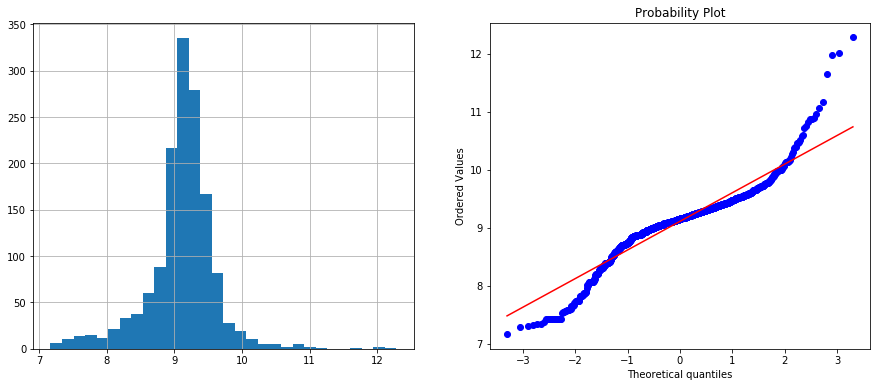

In [77]:
diagnostic_plots(data_t, 'LotArea')


### Box-Cox transformation

The Box-Cox transformation is defined as: 

T(Y)=(Y exp(λ)−1)/λ if λ!=0, or log(Y) otherwise. 

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ  are considered and the optimal value for a given variable is selected.

Briefly, for each  λ (the transformation tests several λs), the correlation coefficient of the Probability Plot (Q-Q plot below, correlation between ordered values and theoretical quantiles) is calculated (this optimisation equation actually varies with the implementation). 

The value of λ corresponding to the maximum correlation on the plot is then the optimal choice for λ.

In python, we can evaluate and obtain the best λ with the stats.boxcox function from the package scipy.

Let's have a look.

Optimal λ:  0.006304841218621503


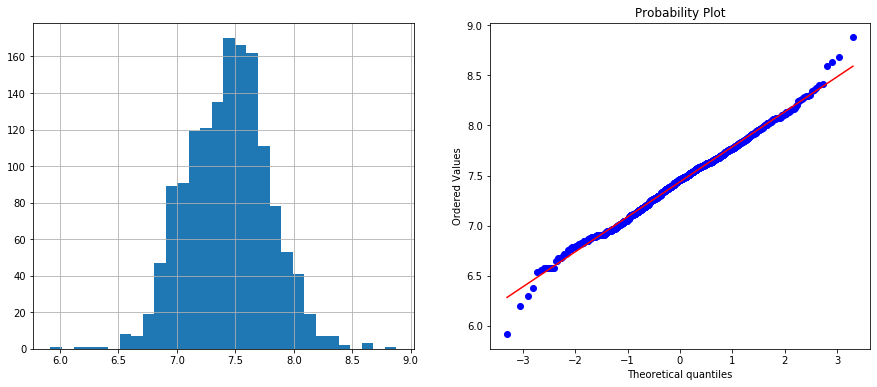

In [45]:
data['GrLivArea_boxcox'], param = stats.boxcox(data['GrLivArea']) 

print('Optimal λ: ', param)

diagnostic_plots(data, 'GrLivArea_boxcox')

## BoX-CoX Transformation using Scikit-Learn

In [48]:
transformer = PowerTransformer(method='box-cox',standardize=False)
data_t = transformer.fit_transform(data[cols].fillna(1))
data_t = pd.DataFrame(data_t,columns=cols)

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:910: RuntimeWarning: divide by zero encountered in log
  return (lmb - 1) * np.sum(logdata, axis=0) - N/2 * np.log(variance)


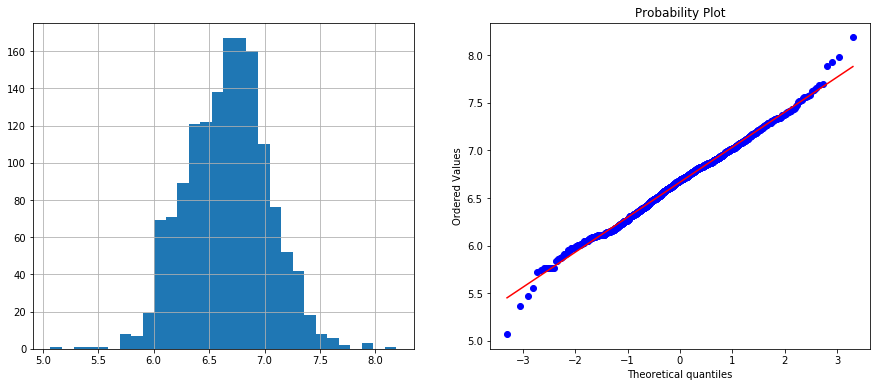

In [49]:
diagnostic_plots(data_t, 'GrLivArea_boxcox')

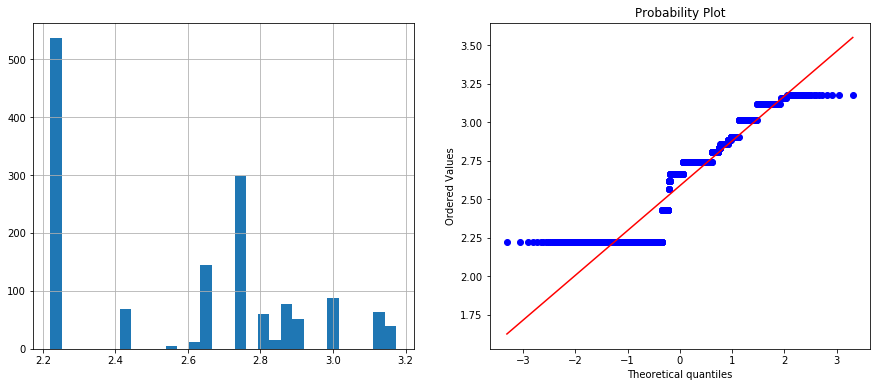

In [50]:
diagnostic_plots(data_t, 'MSSubClass')

## Box-Cox transformation using Feature_Engine

In [78]:
box = vt.BoxCoxTransformer(variables=cols)
box.fit(data)
data_tf = box.transform(data)

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1044: RuntimeWarning: invalid value encountered in less_equal
  if any(x <= 0):
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/optimize.py:1985: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:910: RuntimeWarning: divide by zero encountered in log
  return (lmb - 1) * np.sum(logdata, axis=0) - N/2 * np.log(variance)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/optimize.py:1984: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)


#### Exponents from box cox transformation for each feature(lambda value)

In [81]:
box.lambda_dict_

{'1stFlrSF': -0.07883214484264238,
 'GarageYrBlt': 8.472135811722177,
 'GrLivArea': 0.006304841218621503,
 'LotArea': 0.03094631071248529,
 'LotFrontage': 8.472135811722177,
 'MSSubClass': -0.21084066418027655,
 'MoSold': 0.7759250964642064,
 'OverallCond': 0.41391222511848924,
 'OverallQual': 0.7622455813221418,
 'SalePrice': -0.07692391328663316,
 'TotRmsAbvGrd': 0.2180748902758996,
 'YearBuilt': 22.116549618148454,
 'YearRemodAdd': 40.56817849864235,
 'YrSold': -222.16612749505842}

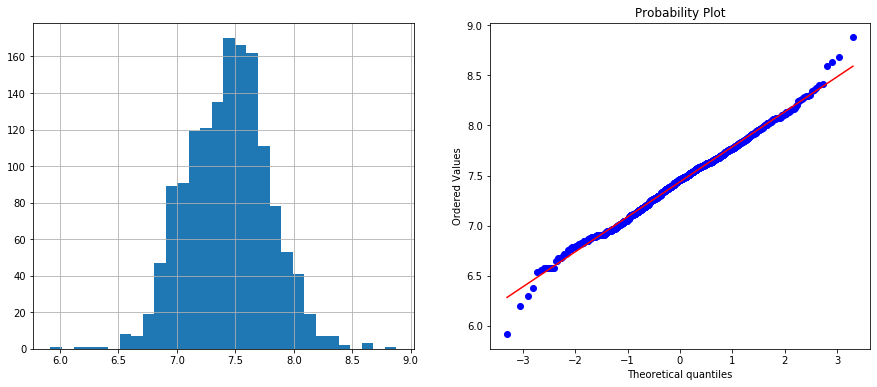

In [79]:
diagnostic_plots(data_tf, 'GrLivArea')

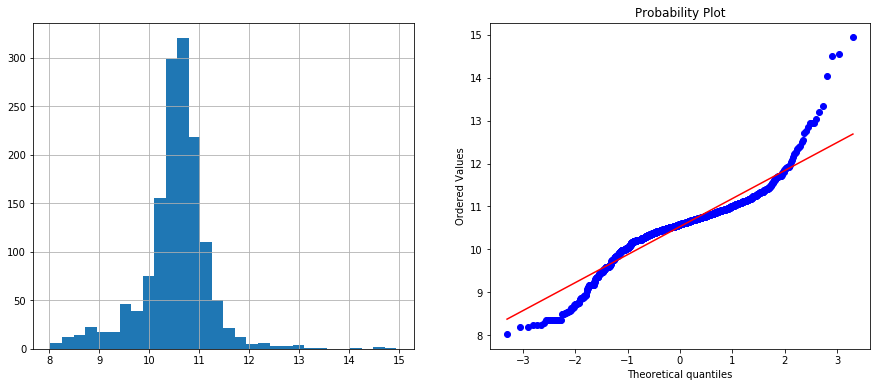

In [80]:
diagnostic_plots(data_tf, 'LotArea')

### Yeo-Johnson

Yeo-Johnson is the same as Box-Cox for the positive values of the variable, but it has different equations for the negative values of the variable as described [here](https://www.stat.umn.edu/arc/yjpower.pdf)

Again, the function searches over a bunch of λ and selects the one that returns the best fit to a normal distribution. 

In [0]:
# to avoid a NumPy error

data['GrLivArea'] = data['GrLivArea'].astype('float')

Optimal λ:  0.005539641278705955


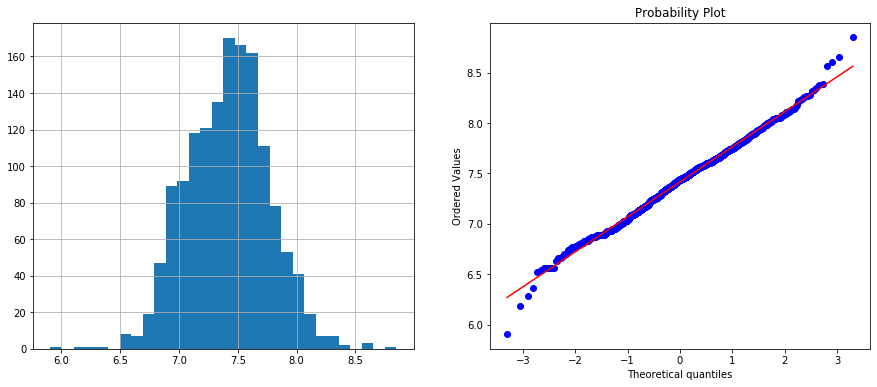

In [14]:
data['GrLivArea_yeojohnson'], param = stats.yeojohnson(data['GrLivArea']) 

print('Optimal λ: ', param)

diagnostic_plots(data, 'GrLivArea_yeojohnson')

We can see that after the transformation, the quantiles are somewhat more aligned over the 45 degree line with the theoreical quantiles of the Gaussian distribution.

## Yeo-Johnson transformation using scikit learn.

it applies to both positive and neagative values

In [51]:
data.dtypes

Id                        int64
MSSubClass                int64
MSZoning                 object
LotFrontage             float64
LotArea                   int64
                         ...   
GrLivArea_reciprocal    float64
GrLivArea_sqr           float64
GrLivArea_exp           float64
GrLivArea_boxcox        float64
GrLivArea_yeojohnson    float64
Length: 87, dtype: object

In [82]:
cols = []
for col in data.columns:
  if data[col].dtypes != 'O' and col != 'Id' and '_' not in col:
    cols.append(col)

cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [54]:
transformer = PowerTransformer(method='yeo-johnson',standardize=False)
data_t = transformer.fit_transform(data[cols].fillna(1))
data_t = pd.DataFrame(data_t,columns=cols)

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [55]:
data_t.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,GrLivArea_log,GrLivArea_reciprocal,GrLivArea_sqr,GrLivArea_exp,GrLivArea_boxcox,GrLivArea_yeojohnson
0,2.661928,32.210544,10.427531,4.691018,2.235408,5.219168e+71,2.572164e+132,2.972693,15.235368,-0.0,20.452663,198.284295,5.219622,4.527843,-0.0,7.600484,0.425418,-0.000000,1.723636,0.352122,2.832075,0.390035,2.402306,-0.000000,1.144115e+08,2.515980,204.517915,-0.000000,4.227899,-0.000000,-0.0,-0.0,-0.0,-0.0,1.698031,0.367463,7.932276,8.343900,0.000408,3.645589,4.984842,7.915635,7.894386
1,2.191299,37.998333,10.596445,4.145378,2.888050,3.865872e+71,1.483168e+132,-0.000000,16.750863,-0.0,28.330978,264.601145,5.442275,-0.000000,-0.0,7.284380,-0.000000,0.039486,1.723636,-0.000000,2.832075,0.390035,2.105656,0.607742,1.105001e+08,2.515980,177.329636,4.594581,0.000000,-0.000000,-0.0,-0.0,-0.0,-0.0,3.747383,0.367463,7.877935,7.984346,0.000492,3.505271,4.782677,7.579198,7.559993
2,2.661928,33.389635,10.807340,4.691018,2.235408,5.105119e+71,2.520579e+132,2.919113,13.632899,-0.0,35.046589,209.206786,5.261495,4.533735,-0.0,7.645780,0.425418,-0.000000,1.723636,0.352122,2.832075,0.390035,2.105656,0.607742,1.141190e+08,2.515980,222.579733,-0.000000,3.844769,-0.000000,-0.0,-0.0,-0.0,-0.0,6.096993,0.367463,7.959281,8.395451,0.000396,3.665692,5.013809,7.963872,7.942329
3,2.720051,30.218500,10.589519,4.691018,2.235408,1.932268e+71,1.311028e+132,-0.000000,10.593524,-0.0,39.069656,180.779930,5.286701,4.475937,-0.0,7.604739,0.425418,-0.000000,0.914711,-0.000000,2.832075,0.390035,2.262532,0.607742,1.136809e+08,4.056638,232.664362,-0.000000,3.659326,0.704006,-0.0,-0.0,-0.0,-0.0,1.698031,0.367463,7.774637,8.348742,0.000407,3.647477,4.987563,7.920166,7.898889
4,2.661928,39.500034,11.124530,5.216463,2.235408,5.048990e+71,2.420420e+132,3.121590,14.902456,-0.0,37.229500,246.150776,5.387108,4.615200,-0.0,7.862156,0.425418,-0.000000,1.723636,0.352122,3.734584,0.390035,2.528459,0.607742,1.139728e+08,4.056638,288.451992,4.310041,4.559556,-0.000000,-0.0,-0.0,-0.0,-0.0,7.697928,0.367463,8.002533,8.641813,0.000342,3.761701,5.152166,8.194398,8.171442


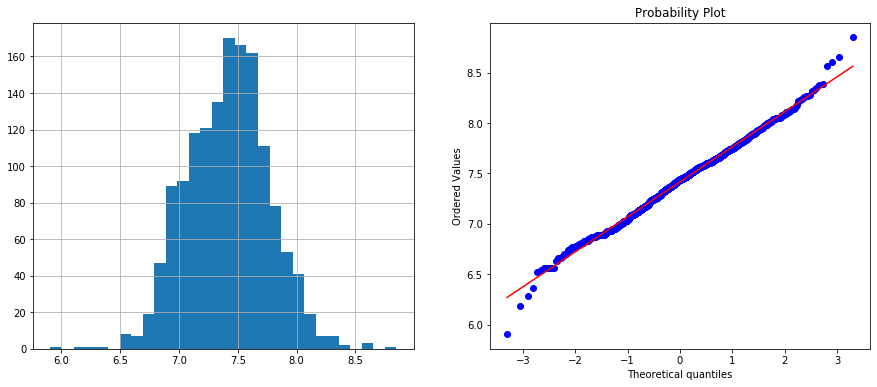

In [56]:
diagnostic_plots(data_t, 'GrLivArea')

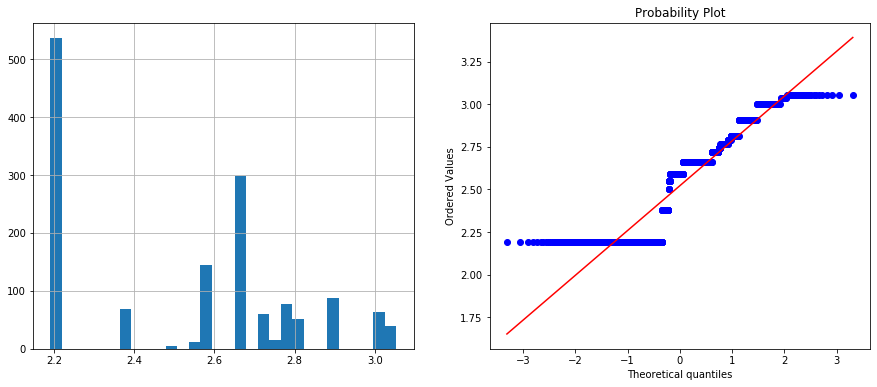

In [57]:
diagnostic_plots(data_t, 'MSSubClass')

Selecting numerical and positive values in the dataset

## Yeo-Johnson transformer using Feature_Engine

In [83]:
yeo = vt.YeoJohnsonTransformer(variables=cols)
yeo.fit(data)
data_tf = yeo.transform(data)

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1371: RuntimeWarning: invalid value encountered in greater_equal
  pos = x >= 0  # binary mask
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/optimize.py:1985: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


In [84]:
yeo.lambda_dict_

{'1stFlrSF': -0.07987709830415687,
 '2ndFlrSF': -0.12741730779016755,
 '3SsnPorch': -11.671535755645818,
 'BedroomAbvGr': 0.9317009720902586,
 'BsmtFinSF1': 0.22872562524018467,
 'BsmtFinSF2': -1.5215505484996374,
 'BsmtFullBath': -1.5451806421969707,
 'BsmtHalfBath': -25.325667937646795,
 'BsmtUnfSF': 0.4712723599394073,
 'EnclosedPorch': -1.419949234340374,
 'Fireplaces': -0.3880997564624989,
 'FullBath': 0.7664541929442169,
 'GarageArea': 0.8112580246118668,
 'GarageCars': 1.3456220474299723,
 'GarageYrBlt': 8.472135811722177,
 'GrLivArea': 0.005539641278705955,
 'HalfBath': -2.2378587510462524,
 'KitchenAbvGr': -1.8552608237232504,
 'LotArea': 0.03081854079393649,
 'LotFrontage': 8.472135811722177,
 'LowQualFinSF': -10.018636837166552,
 'MSSubClass': -0.22931471490337138,
 'MasVnrArea': 8.472135811722177,
 'MiscVal': -4.283463540030555,
 'MoSold': 0.7424823331311737,
 'OpenPorchSF': 0.011642789763656977,
 'OverallCond': 0.23845916443176124,
 'OverallQual': 0.6991980180333875,
 'Poo

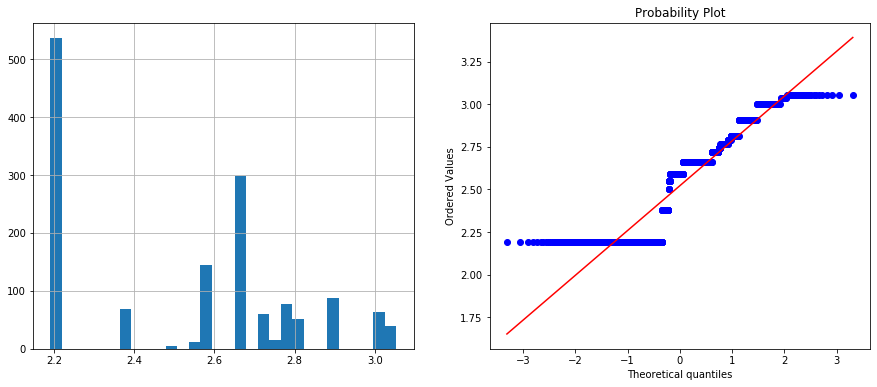

In [85]:
diagnostic_plots(data_tf, 'MSSubClass')

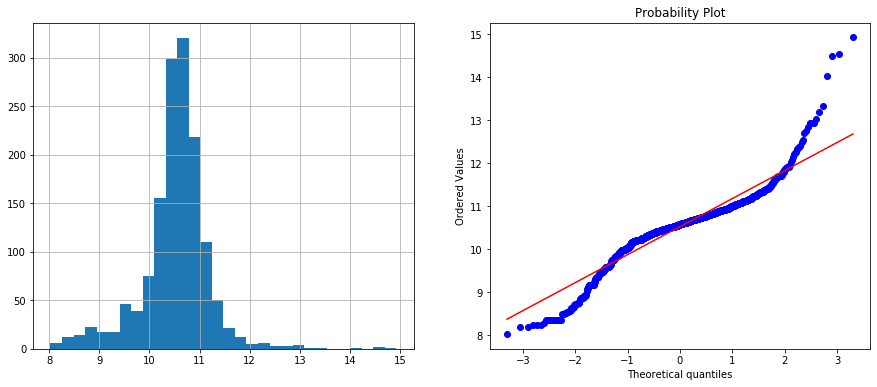

In [86]:
diagnostic_plots(data_tf, 'LotArea')